# Lista 04 - Teste de Hipótese

In [1]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2019104)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [3]:
def q1a():
    return [False, False, True]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance.

In [4]:
def tvd(p, q):
    soma = 0
    for i in range(len(p)):
        soma += abs(p[i] - q[i])
    return soma / 2

In [5]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [6]:
def normalize(a):
    return a / a.sum()

def q1c():
    return tvd(normalize(np.array([2000, 8000, 2500])), normalize(np.array([100, 600, 300])))

q1c()

0.1

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

In [7]:
def gera_amostra(tamanho_amostra):
    population = [0] * 100 + [1] * 600 + [2] * 300
    sample = np.random.choice(population, tamanho_amostra, replace=True)
    f = np.zeros(3, int)
    for i in range(tamanho_amostra):
        f[sample[i]] += 1
    return normalize(f)

    
gera_amostra(100)

array([0.06, 0.58, 0.36])

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

In [8]:
tvds = []
for i in range(10000):
    sample = gera_amostra(1000)
    tvds.append(tvd(normalize(np.array([100, 600, 300])), sample))

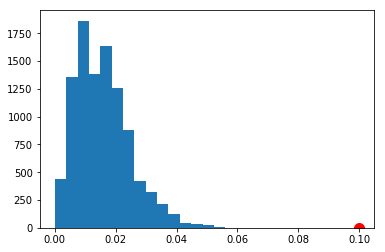

In [23]:
plt.hist(tvds, bins=15)
plt.plot([q1c()], [0], 'ro', ms=10)

F) Escreva uma função que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de 90% de confiança

In [10]:
def q1f():
    tvds_np = np.array(tvds)
    return (np.percentile(tvds_np, 5), np.percentile(tvds_np, 95))

q1f()

(0.003999999999999997, 0.032999999999999995)

# Exercício 02:

Usando os dados do arquivo ```baby.csv```, vamos realizar um teste por permutação.

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,3.401940,284,27,1.5748,2.834950,False
1,3.203493,282,33,1.6256,3.827183,False
2,3.628736,279,28,1.6256,3.260193,True
3,3.061746,282,23,1.7018,3.543687,True
4,3.855532,286,25,1.5748,2.636503,False


A) Implemente uma função que retorne a diferença entre a média dos pesos dos bebês para as mães fumantes e a média para as mães não fumantes. Exemplo:

```python
def q2a(df):
    media_fumantes = 3.1
    media_nao_fumantes = 3.8
    return -0.7
```

In [13]:
def q2a(df):
    media_fumantes = df[df['Maternal Smoker'] == True]['Birth Weight'].mean()
    media_nao_fumantes = df[df['Maternal Smoker'] == False]['Birth Weight'].mean()
    return media_fumantes - media_nao_fumantes

q2a(df)

-0.2626905088456186

B) Realize permutações com os rótulos (mães fumantes / não fumantes), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias de peso dos bebês, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

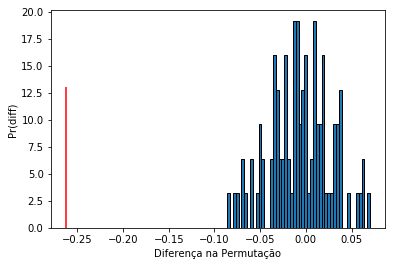

In [14]:
from IPython.display import Image
Image('100permutacoes.png')

In [15]:
filtro = df['Maternal Smoker'] == True

In [16]:
def gera_diferencas_e_plota(numero_permutacoes):
    diferencas = np.zeros(numero_permutacoes)
    for i in range(numero_permutacoes):
        np.random.shuffle(filtro.values)
        diff = df[~filtro]['Birth Weight'].mean() - df[filtro]['Birth Weight'].mean()
        diferencas[i] = diff
    plt.hist(diferencas, bins=numero_permutacoes)
    plt.axvline(x=q2a(df), color='red')

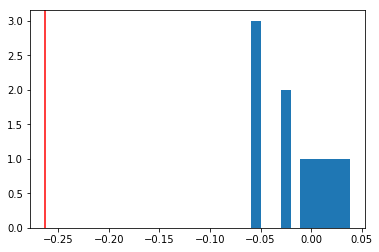

In [17]:
gera_diferencas_e_plota(10)

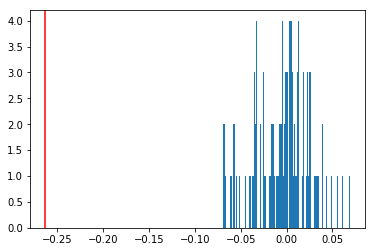

In [18]:
gera_diferencas_e_plota(100)

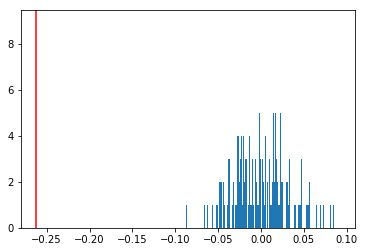

In [19]:
gera_diferencas_e_plota(500)

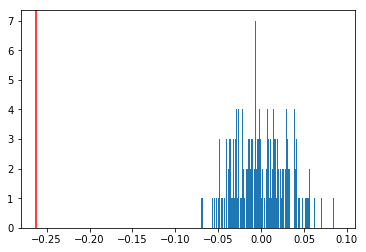

In [20]:
gera_diferencas_e_plota(1000)

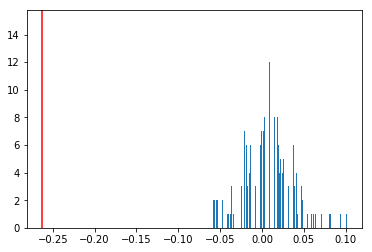

In [21]:
gera_diferencas_e_plota(5000)

B) Escreva abaixo o que você observou com os gráficos.

Queremos testar se o fato da mulher grávida ser fumante implica algo no peso da recém-nascido ser menor. Temos como hipótese nula "A relação entre a mulher grávida ser fumante e o recém-nascido ter peso menor é ao acaso" e como hipótese alternativa "Mulheres fumantes tem filhos recém-nascidos com peso menor do que os filhos recém-nascidos das mulheres não fumantes".

Os gráficos mostram simulações permutando as mulheres entre os grupos para gerar as situações ao acaso. Como o caso observado na amostra é extremo em relação as permutações geradas, rejeitamos a hipótese nula e aceitamos a hipótese alternativa.